In [169]:
import pandas as pd

In [170]:
df = pd.read_csv('insurance.csv')

In [171]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [173]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Let's save our work before continuing.

In [174]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [175]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [176]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [177]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (between 18 & 64) in the USA.



> **EXERCISE**: Can you explain why there are over twice as many customers with ages 18 and 19, compared to other ages?
>
> ???


### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [178]:
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

### Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [179]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['red', 'yellow'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.


> **EXERCISE**: Visualize the distribution of medical charges in connection with other factors like "sex" and "region". What do you observe?

In [180]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [181]:
px.histogram(df, 
             x='smoker', 
             color='sex', 
             title='Smoker')

In [182]:
fig = px.histogram(df, 
                   x='region', 
                   color='sex', 
                   color_discrete_sequence=['red', 'yellow'], 
                   title='Annual Medical Charges based on region and sex')
fig.update_layout(bargap=0.1)
fig.show()

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?



> **EXERCISE**: Visualize the distributions of the "sex", "region" and "children" columns and report your observations. 

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [183]:
fig = px.scatter(df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     

> **EXERCISE**: What other inferences can you draw from the above chart?
>
> ???

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [184]:
fig = px.scatter(df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex','age'], 
                 title='BMI V/S Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

What other insights can you gather from the above graph?

> **EXERCISE**: Create some more graphs to visualize how the "charges" column is related to other columns ("children", "sex", "region" and "smoker"). Summarize the insights gathered from these graphs.
>
> *Hint*: Use violin plots (`px.violin`) and bar plots (`sns.barplot`)


In [185]:
px.violin(df, x='children', y='charges')

## Correlation

In [186]:
df.charges.corr(df.age)

0.2990081933306478

In [187]:
df.charges.corr(df.children)

0.06799822684790487

In [188]:
df.charges.corr(df.bmi)

0.19834096883362887

In [189]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = df.smoker.map(smoker_values)

In [190]:
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [191]:
df.charges.corr(smoker_numeric)

0.7872514304984778

In [192]:
# we can also use corr with whole DATASET

dp = df.drop(columns=['smoker','region','sex'])
dp['smokerBinary'] = smoker_numeric
dp.corr()

,age,bmi,children,charges,smokerBinary
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smokerBinary,-0.025019,0.003750,0.007673,0.787251,1.000000


<Axes: >

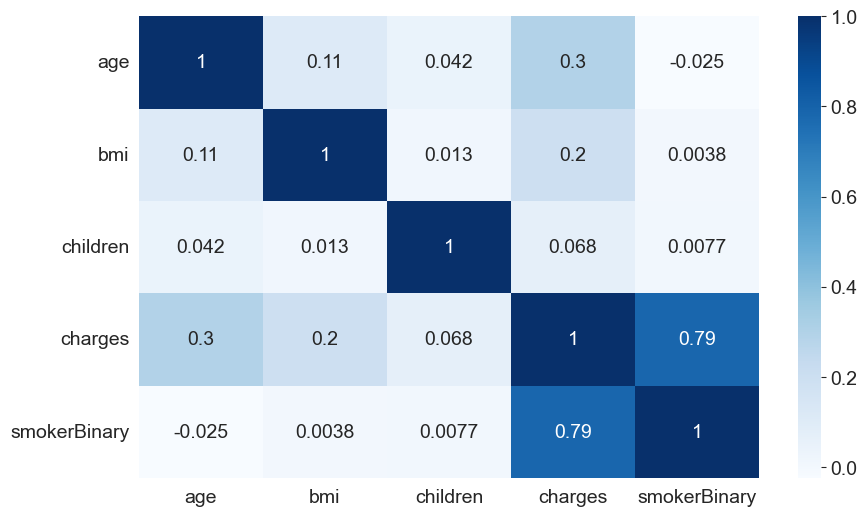

In [193]:
sns.heatmap(dp.corr(), cmap='Blues', annot=True)

## Linear Regression (Using single feature)

In [194]:
nonSmoker_df = df[df.smoker == 'no']
nonSmoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges for Non Smokers'}, xlabel='age', ylabel='charges'>

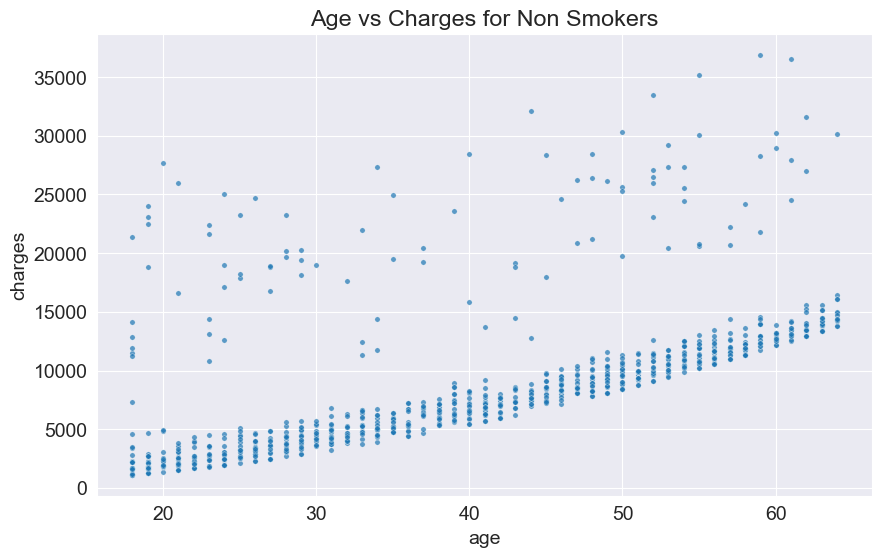

In [195]:
plt.title('Age vs Charges for Non Smokers')

sns.scatterplot(data = nonSmoker_df, x='age', y='charges', alpha=0.7, s=15)

In [196]:
def estimateCharges(age,m,c):
    return age*m + c;

# assuming  that out Linear regression forms a line with gernalised formula y = mx + c where m is the slope of the line and c is the constatant intercepr when the value of x is 0 

In [197]:
estimateCharges(30,50,100)

1600

In [226]:
# Assuming values of m and c
m = 50;
c = 100;

In [227]:
ages = nonSmoker_df.age
estimatedCharges = estimateCharges(ages, m, c)
estimatedCharges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [228]:
nonSmoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

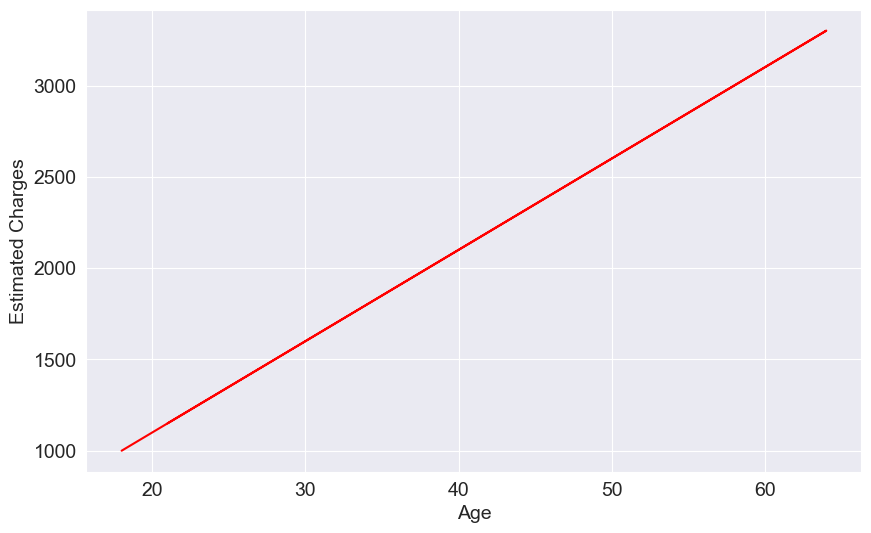

In [229]:
plt.plot(ages, estimatedCharges, 'r-');
plt.xlabel('Age')
plt.ylabel('Estimated Charges');

### Lets try plotting this line over the actual data to see if it actually fits

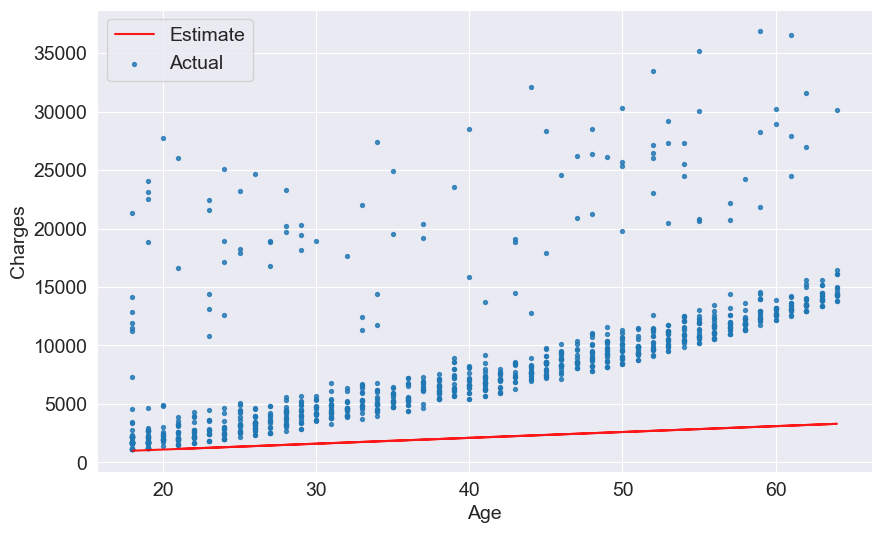

In [230]:
target = nonSmoker_df.charges
plt.plot(ages, estimatedCharges, 'r', alpha=0.9);

plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate','Actual']);

# Not Even Close
### lets try changing parameters a littlebit, les make a function for the same

In [231]:
def tryParams(m,c):
    ages = nonSmoker_df.age
    target = nonSmoker_df.charges

    estimatedCharges = estimateCharges(ages, m, c)

    plt.plot(ages, estimatedCharges, 'r', alpha=0.9);

    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate','Actual']);

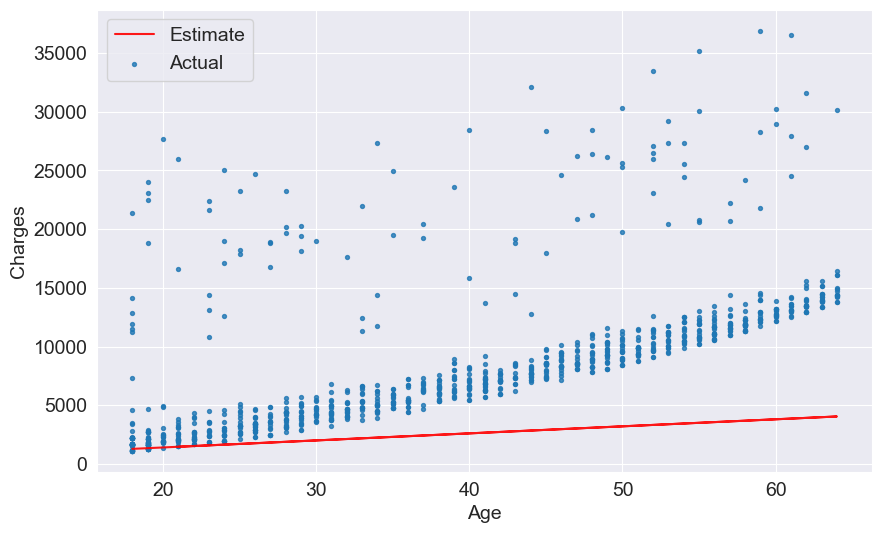

In [232]:
tryParams(60, 200)

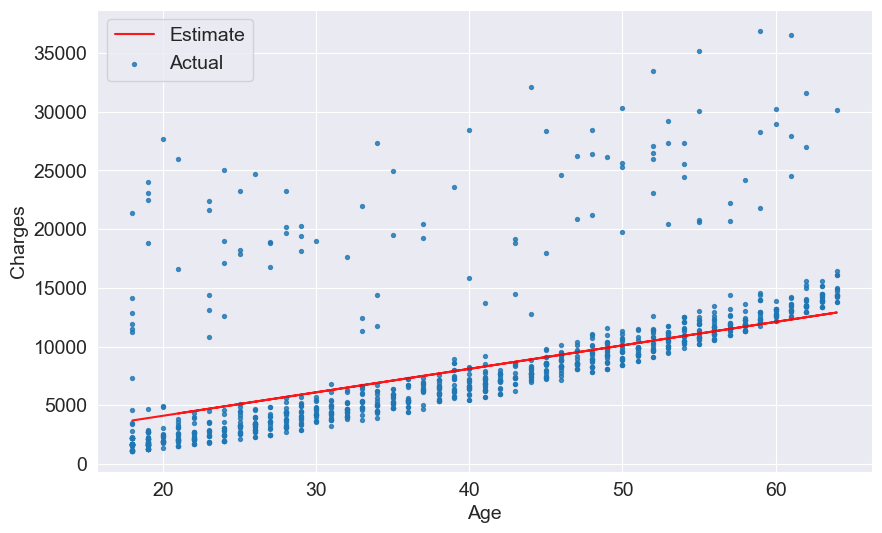

In [233]:
tryParams(200, 100)

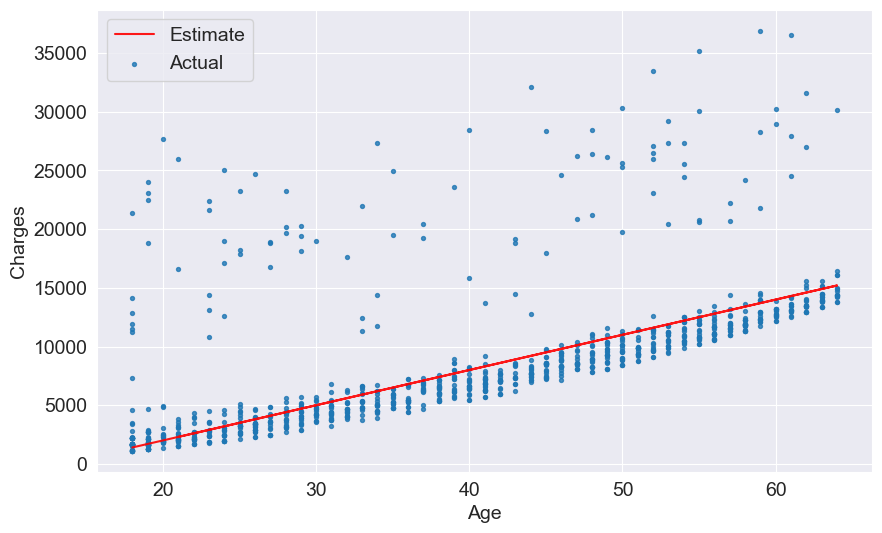

In [259]:
tryParams(300, -4000)

#### Now insted of manually checking different values, wouldnt it be better  if a  computer could chech various values and gives us the best result?